# **Analysis on Raw** **Diamonds**

In [ ]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Dataset
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload a file

Saving raw_diamonds.csv to raw_diamonds.csv


In [ ]:
# Display shape of the table
df = pd.read_csv('raw_diamonds.csv')
df.shape

(20000, 13)

In [ ]:
# Show the first 5 rows
df.head()

,diamond_id,batch_id,supplier_id,origin_country,weight_carat,clarity,color,shape,fluorescence,received_date,purchase_price,certification_number,status
0,DIA000001,BATCH0478,SUP002,Canada,4.46,FL,F,Cushion,Faint,2022-03-24,20705.99,CERT00000001,Unprocessed
1,DIA000002,BATCH0069,SUP070,Botswana,6.66,VS1,H,Round,Medium,2022-07-21,36494.87,CERT00000002,Processing
2,DIA000003,BATCH0388,SUP036,Canada,8.27,SI1,H,Cushion,Strong,2020-11-21,32647.34,CERT00000003,Processing
3,DIA000004,BATCH0074,SUP034,Botswana,5.60,SI1,G,Emerald,Faint,2024-08-14,1209.09,CERT00000004,Processing
4,DIA000005,BATCH0297,SUP001,Australia,2.09,FL,E,Princess,Faint,2023-09-14,3536.46,CERT00000005,Unprocessed


In [ ]:
# Display info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diamond_id            20000 non-null  object 
 1   batch_id              20000 non-null  object 
 2   supplier_id           20000 non-null  object 
 3   origin_country        20000 non-null  object 
 4   weight_carat          20000 non-null  float64
 5   clarity               20000 non-null  object 
 6   color                 20000 non-null  object 
 7   shape                 20000 non-null  object 
 8   fluorescence          14890 non-null  object 
 9   received_date         20000 non-null  object 
 10  purchase_price        20000 non-null  float64
 11  certification_number  20000 non-null  object 
 12  status                20000 non-null  object 
dtypes: float64(2), object(11)
memory usage: 2.0+ MB


In [ ]:
# Intrepretations
# We have 2000 columns and 12 rows
# We have 2 Numerical and 10 Categorical data.
# We dont have null values in the dataset

In [ ]:
# Describe the data
df.describe()

,weight_carat,purchase_price
count,20000.000000,20000.000000
mean,5.156187,25404.496461
std,2.811181,14186.930281
min,0.200000,503.150000
25%,2.750000,13235.167500
50%,5.190000,25526.455000
75%,7.580000,37630.015000
max,10.000000,49998.740000


In [ ]:
# Intrepretation
# We have 2 Numerical columns that is weight_carat and purchase_price.

In [ ]:
# Check the columns in the data
df.columns

Index(['diamond_id', 'batch_id', 'supplier_id', 'origin_country',
       'weight_carat', 'clarity', 'color', 'shape', 'fluorescence',
       'received_date', 'purchase_price', 'certification_number', 'status'],
      dtype='object')

In [ ]:
# diamond_id : Represents the Diamond IDs .
# batch_id : Represents the Batch
# supplier_id : Gives the Supplier's ID
# origin_country : Represents the origin of the country
# weight_carat : Represents the Weight/Carat of the Diamonds
# clarity : Gives the Clarity of Diamonds
# color : Gives the color of diamond
# shape : Gives the shape
# fluorescence: Gives the flurorescence
# received_date : Represents the Received Date
# Purchase_price : Gives the Purchase date
# certification_number : Gives the certification no.
# status : Represents the status of Diamonds

DATA PREPROCESSING

**DATA CLEANING**

In [ ]:
# rename the new columns
df.rename(columns={'diamond_id':'Diamond_Id','batch_id' : 'Batch_Id', 'supplier_id' : 'Supplier_Id', 'origin_country' : 'Origin_Country',
       'weight_carat': 'Weight_Carat', 'clarity': 'Clarity' , 'color': 'Color', 'shape': 'Shape', 'fluorescence' : 'Fluorescence',
       'received_date': 'Received_Date', 'purchase_price': 'Purchase_Price', 'certification_number':'Certification_Number', 'status':'Status'},inplace=True)

In [ ]:
# Show the new columns
df.columns

Index(['Diamond_id', 'Batch_id', 'Supplier_id', 'Origin_country',
       'Weight_Carat', 'Clarity', 'Color', 'Shape', 'Fluorescence',
       'Received_Date', 'Purchase_Price', 'Certification_Number', 'Status'],
      dtype='object')

**NULL VALUE HANDLING**

In [ ]:
# Check the null values
df.isnull().sum()

,0
Diamond_id,0
Batch_id,0
Supplier_id,0
Origin_country,0
Weight_Carat,0
Clarity,0
Color,0
Shape,0
Fluorescence,5110
Received_Date,0


In [ ]:
# Lets check column wise missing data percentage
df.isnull().sum()/df.shape[0]*100

,0
Batch_id,0.00
Supplier_id,0.00
Origin_country,0.00
Weight_Carat,0.00
Clarity,0.00
Color,0.00
Shape,0.00
Fluorescence,25.55
Received_Date,0.00
Status,0.00


In [ ]:
# Here missing data is 25 percesnt lets ceheck the datatype of Fluorescence
df['Fluorescence'].dtypes

dtype('O')

In [ ]:
# find the mode of Fluorescence
df['Fluorescence'].mode()

,Fluorescence
0,Strong


In [ ]:
# lets do the fill na on Fluorescence and replace the missing records with Strong
df['Fluorescence'].fillna('Strong',inplace=True)

<ipython-input-124-b93d30c086af>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fluorescence'].fillna('Strong',inplace=True)


In [ ]:
# check the missing records in data
df.isnull().sum()

,0
Batch_id,0
Supplier_id,0
Origin_country,0
Weight_Carat,0
Clarity,0
Color,0
Shape,0
Fluorescence,0
Received_Date,0
Status,0


In [ ]:
# Intrepretation
# We dont have null values except for the column fluorescene.

# **EDA**

### **UNIVARIATE ANALYSIS**

In [ ]:
# show the columns
df.columns

Index(['Diamond_id', 'Batch_id', 'Supplier_id', 'Origin_country',
       'Weight_Carat', 'Clarity', 'Color', 'Shape', 'Fluorescence',
       'Received_Date', 'Purchase_Price', 'Certification_Number', 'Status'],
      dtype='object')

In [ ]:
# Diamond_id

In [ ]:
# Show the count of Diamond_ID column
df['Diamond_id'].value_counts()

,count
Diamond_id,
DIA000001,1
DIA013331,1
DIA013338,1
DIA013337,1
DIA013336,1
...,...
DIA006667,1
DIA006666,1
DIA006665,1


In [ ]:
# Interpretation
# We have all unique values in this column so we cant go more for analysis

In [ ]:
# Drop the Diamond_id column from the data
df.drop('Diamond_id',axis=1,inplace=True)

In [ ]:
# show the columns
df.columns

Index(['Batch_id', 'Supplier_id', 'Origin_country', 'Weight_Carat', 'Clarity',
       'Color', 'Shape', 'Fluorescence', 'Received_Date', 'Purchase_Price',
       'Certification_Number', 'Status'],
      dtype='object')

In [ ]:
#Batch_id

In [ ]:
# Show the count of batch_id column
df['Batch_id'].value_counts().head()

,count
Batch_id,
BATCH0251,60
BATCH0186,58
BATCH0383,58
BATCH0073,57
BATCH0152,56


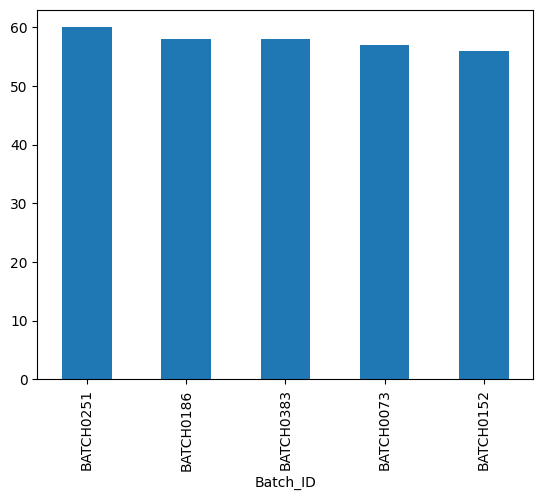

In [ ]:
# Lets plot the count in bar chart
df['Batch_ID'].value_counts().head().plot(kind='bar') # Changed 'Batch_id' to 'Batch_ID'
plt.show()

In [ ]:
# Intrepretation
# We have all the Imp Batch_id
#BATCH0251	60
#BATCH0186	58
#BATCH0383	58
#BATCH0073	57
#BATCH0152	56

In [ ]:
# show the columns
df.columns

Index(['Batch_id', 'Supplier_id', 'Origin_country', 'Weight_Carat', 'Clarity',
       'Color', 'Shape', 'Fluorescence', 'Received_Date', 'Purchase_Price',
       'Certification_Number', 'Status'],
      dtype='object')

In [ ]:
# Supplier_id

In [ ]:
# Show the count of Supplier_id column
df['Supplier_id'].value_counts().head()

,count
Supplier_id,
SUP082,246
SUP058,237
SUP051,234
SUP077,230
SUP099,229


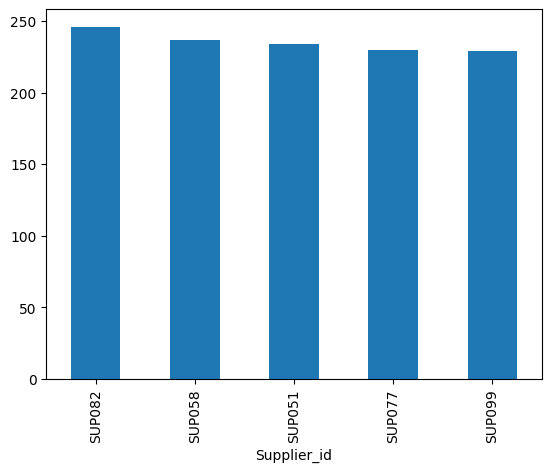

In [ ]:
# Lets plot the count
df['Supplier_id'].value_counts().head().plot(kind='bar')
plt.show()

In [ ]:
# Intrepretation
# We have all the important Supplier ID
#SUP082	246
#SUP058	237
#SUP051	234
#SUP077	230
#SUP099	229


In [ ]:
# Show the columns
df.columns

Index(['Batch_id', 'Supplier_id', 'Origin_country', 'Weight_Carat', 'Clarity',
       'Color', 'Shape', 'Fluorescence', 'Received_Date', 'Purchase_Price',
       'Certification_Number', 'Status'],
      dtype='object')

In [ ]:
#Origin_country

In [ ]:
# Show the count of origin_country
df['Origin_country'].value_counts().head()

,count
Origin_country,
Botswana,4074
Canada,4009
Australia,3977
South Africa,3971
Russia,3969


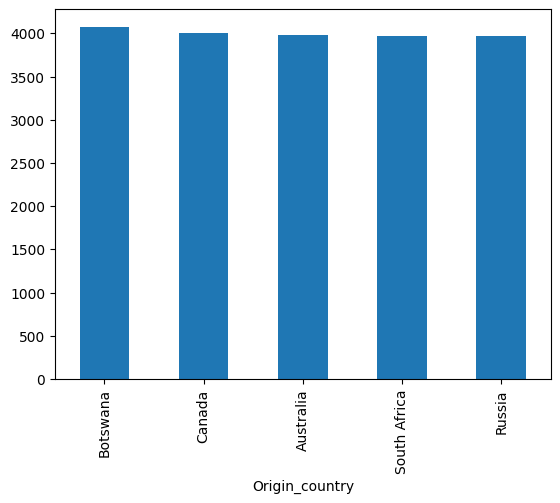

In [ ]:
#Lets plot the data
df['Origin_country'].value_counts().head().plot(kind='bar')
plt.show()

In [ ]:
# Intrepretation
# We have the origin of the country.
# Botswana	4074
# Canada	4009
# Australia	3977
# South Africa	3971
# Russia	3969


In [ ]:
# Show the columns
df.columns

Index(['Batch_id', 'Supplier_id', 'Origin_country', 'Weight_Carat', 'Clarity',
       'Color', 'Shape', 'Fluorescence', 'Received_Date', 'Purchase_Price',
       'Certification_Number', 'Status'],
      dtype='object')

In [ ]:
#Weight Carat

In [ ]:
# Show the count
df['Weight_Carat'].value_counts().head()

,count
Weight_Carat,
7.56,37
8.72,34
2.75,34
8.11,33
7.49,33


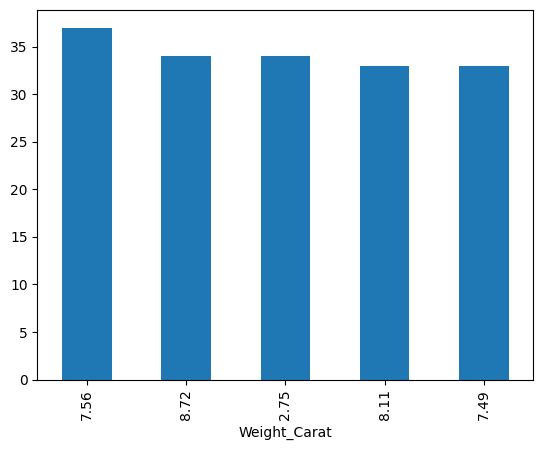

In [ ]:
# Lets plot the bar chart
df['Weight_Carat'].value_counts().head().plot(kind='bar')
plt.show()

In [ ]:
# Intrepretation
# We have all the IMP info about weight carat
# 7.56	37
# 8.72	34
# 2.75	34
# 8.11	33
# 7.49	33


In [ ]:
# Show the columns
df.columns

Index(['Batch_id', 'Supplier_id', 'Origin_country', 'Weight_Carat', 'Clarity',
       'Color', 'Shape', 'Fluorescence', 'Received_Date', 'Purchase_Price',
       'Certification_Number', 'Status'],
      dtype='object')

In [ ]:
# Clarity

In [ ]:
# Show the count of Clarity
df['Clarity'].value_counts().head()


,count
Clarity,
VVS2,2595
VS1,2572
VS2,2510
SI2,2503
FL,2482


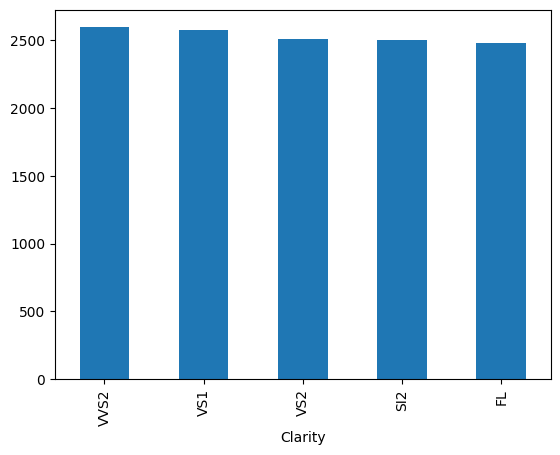

In [ ]:
# Plot the count
df['Clarity'].value_counts().head().plot(kind='bar')
plt.show()

In [ ]:
# Intrepretation
# We have got the clarity of the diamonds
#VVS2	2595
#VS1	2572
#VS2	2510
#SI2	2503
#FL	2482


In [ ]:
#Show the columns
df.columns

Index(['Batch_id', 'Supplier_id', 'Origin_country', 'Weight_Carat', 'Clarity',
       'Color', 'Shape', 'Fluorescence', 'Received_Date', 'Purchase_Price',
       'Certification_Number', 'Status'],
      dtype='object')

In [ ]:
#Color

In [ ]:
#show the count
df['Color'].value_counts().head()

,count
Color,
D,2895
J,2887
F,2864
E,2863
G,2851


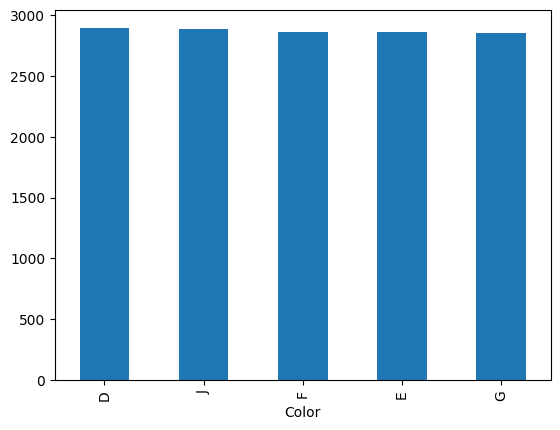

In [ ]:
#Lets plot
df['Color'].value_counts().head().plot(kind='bar')
plt.show()

In [ ]:
# Intrepretation
# We have got the top colors
# D	2895
# J	2887
# F	2864
# E	2863
# G	2851


In [ ]:
# show columns
df.columns

Index(['Batch_id', 'Supplier_id', 'Origin_country', 'Weight_Carat', 'Clarity',
       'Color', 'Shape', 'Fluorescence', 'Received_Date', 'Purchase_Price',
       'Certification_Number', 'Status'],
      dtype='object')

In [ ]:
#Shape

In [ ]:
# Give the count
df['Shape'].value_counts().head()

,count
Shape,
Round,4044
Oval,4039
Cushion,4027
Emerald,3988
Princess,3902


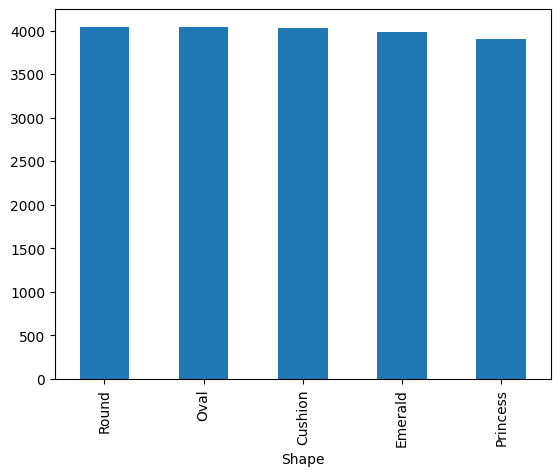

In [ ]:
#Lets plot
df['Shape'].value_counts().head().plot(kind='bar')
plt.show()

In [ ]:
#Intrepretation
# We have got the top shapes
# Round	4044
# Oval	4039
# Cushion	4027
# Emerald	3988
# Princess	3902


In [ ]:
# Show the columns
df.columns

Index(['Batch_id', 'Supplier_id', 'Origin_country', 'Weight_Carat', 'Clarity',
       'Color', 'Shape', 'Fluorescence', 'Received_Date', 'Purchase_Price',
       'Certification_Number', 'Status'],
      dtype='object')

In [ ]:
#Fluourescence

In [ ]:
# Count
df['Fluorescence'].value_counts().head()

,count
Fluorescence,
Strong,4987
Faint,4968
Medium,4935


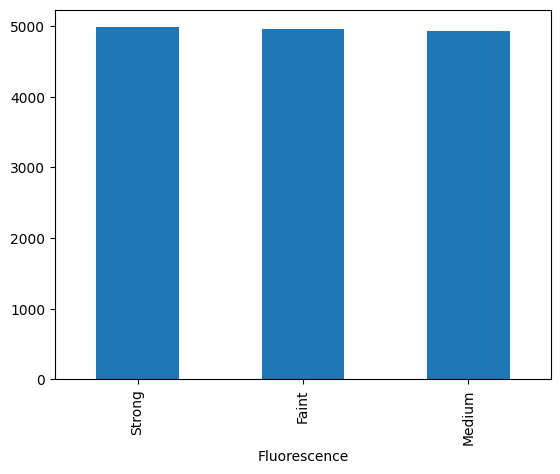

In [ ]:
# Plot
df['Fluorescence'].value_counts().head().plot(kind='bar')
plt.show()

In [ ]:
# Intrepretation
# Got the fluroscence
# Strong	4987
# Faint	4968
# Medium	4935


In [ ]:
# Show columns
df.columns

Index(['Batch_id', 'Supplier_id', 'Origin_country', 'Weight_Carat', 'Clarity',
       'Color', 'Shape', 'Fluorescence', 'Received_Date', 'Purchase_Price',
       'Certification_Number', 'Status'],
      dtype='object')

In [ ]:
# Received Data

In [ ]:
# Count
df['Received_Date'].value_counts().head()

,count
Received_Date,
2022-07-23,22
2023-07-19,22
2021-12-20,22
2023-07-22,22
2024-08-14,21


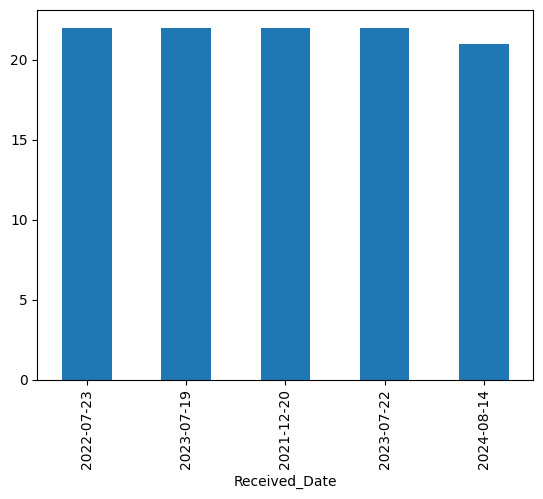

In [ ]:
#Plot
df['Received_Date'].value_counts().head().plot(kind='bar')
plt.show()

In [ ]:
# Intrepretation
# Data about the Received date
# 2022-07-23	22
# 2023-07-19	22
# 2021-12-20	22
# 2023-07-22	22
# 2024-08-14	21


In [ ]:
# show columns
df.columns

Index(['Batch_id', 'Supplier_id', 'Origin_country', 'Weight_Carat', 'Clarity',
       'Color', 'Shape', 'Fluorescence', 'Received_Date', 'Purchase_Price',
       'Certification_Number', 'Status'],
      dtype='object')

In [ ]:
# Purchase_Price

In [ ]:
# Count
df['Purchase_Price'].value_counts().head()

,count
Purchase_Price,
4444.04,2
43824.75,2
24455.29,2
45224.40,2
34532.36,2


In [ ]:
#drop
df.drop('Purchase_Price',axis=1,inplace=True)

In [ ]:
#Intrepreatation
# We have droped the Purchased price column because they have unique values.

In [ ]:
# show the new columns
df.columns

Index(['Batch_id', 'Supplier_id', 'Origin_country', 'Weight_Carat', 'Clarity',
       'Color', 'Shape', 'Fluorescence', 'Received_Date',
       'Certification_Number', 'Status'],
      dtype='object')

In [ ]:
# Cetification number

In [ ]:
# Count
df['Certification_Number'].value_counts().head()

,count
Certification_Number,
CERT00000001,1
CERT00013331,1
CERT00013338,1
CERT00013337,1
CERT00013336,1


In [ ]:
# drop
df.drop('Certification_Number',axis=1,inplace=True)

In [ ]:
#Intrepretation
# We have droped the certification column because we have all unique values.

In [ ]:
# show columns
df.columns

Index(['Batch_id', 'Supplier_id', 'Origin_country', 'Weight_Carat', 'Clarity',
       'Color', 'Shape', 'Fluorescence', 'Received_Date', 'Status'],
      dtype='object')

In [ ]:
# Status

In [ ]:
# count
df['Status'].value_counts().head()

,count
Status,
Processing,6765
Rejected,6727
Unprocessed,6508


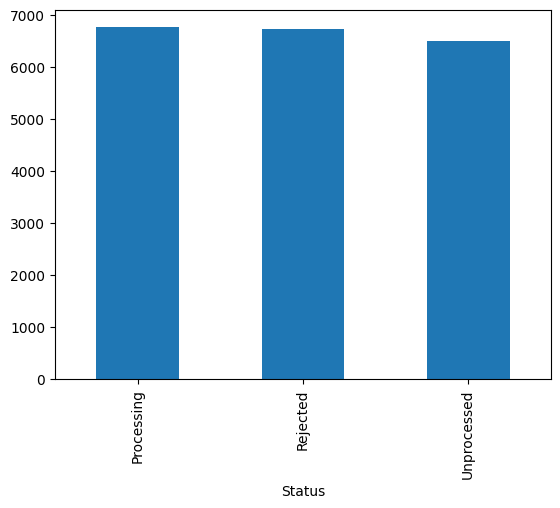

In [ ]:
# Plot
df['Status'].value_counts().head().plot(kind='bar')
plt.show()

In [ ]:
# Intrepretation
# We have the imp status
# Processing	6765
# Rejected	6727
# Unprocessed	6508


In [ ]:
# show columns
df.columns

Index(['Batch_id', 'Supplier_id', 'Origin_country', 'Weight_Carat', 'Clarity',
       'Color', 'Shape', 'Fluorescence', 'Received_Date', 'Status'],
      dtype='object')

In [ ]:
# We have done the Univariate Analysis.

# **Bivariate analysis**

In [ ]:
# lets segrigate the data based on the datatype
df_num = df.select_dtypes(include=['int64','float64'])
df_cat = df.select_dtypes(include=['object'])
df_num.head()
df_cat.head()

,Batch_id,Supplier_id,Origin_country,Clarity,Color,Shape,Fluorescence,Received_Date,Status
0,BATCH0478,SUP002,Canada,FL,F,Cushion,Faint,2022-03-24,Unprocessed
1,BATCH0069,SUP070,Botswana,VS1,H,Round,Medium,2022-07-21,Processing
2,BATCH0388,SUP036,Canada,SI1,H,Cushion,Strong,2020-11-21,Processing
3,BATCH0074,SUP034,Botswana,SI1,G,Emerald,Faint,2024-08-14,Processing
4,BATCH0297,SUP001,Australia,FL,E,Princess,Faint,2023-09-14,Unprocessed


In [ ]:
# find the correlation for given data
df_num.corr()

,Weight_Carat
Weight_Carat,1.0
